# Exploratory Data Analysis (EDA) on the dataset of fire images
After the Data Acquisition stage, conducting EDA is important to:
- Understand the acquired data
- Ensure the training set contains a variety of images and not biased
- Handle data imbalance (if any)

## Number of images
The dataset is split into 2 portions:
1. **Training set:** 26,203 images  
Data augmentation methods are applied for a more robust model: Rotation, Flip, Random crop, Shear       
2. **Testing set for the model:** 251 images
3. **Testing set for the alarming system:** [...] videos            
The model is applied to recognize fire in each frame of videos


In [29]:
import os
import matplotlib.pyplot as plt
import cv2
import random

In [30]:
def show_images(folder, title, n=15, rows=3):
    '''
    Visualize 15 images selected randomly in the training set
    
    Args:
    folder      directory of the training set
    title       title to show in the figure, i.e. "Sample images"
    
    Output:
    Plot 15 randomly selected images in 3 rows, 5 columns
    '''
    files = os.listdir(folder)
    random_files = random.sample(files,n)
    
    cols = int(n / rows)
    plt.figure(figsize=(5 * cols, 4 * rows))

    
    for i, file in enumerate(random_files):
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()



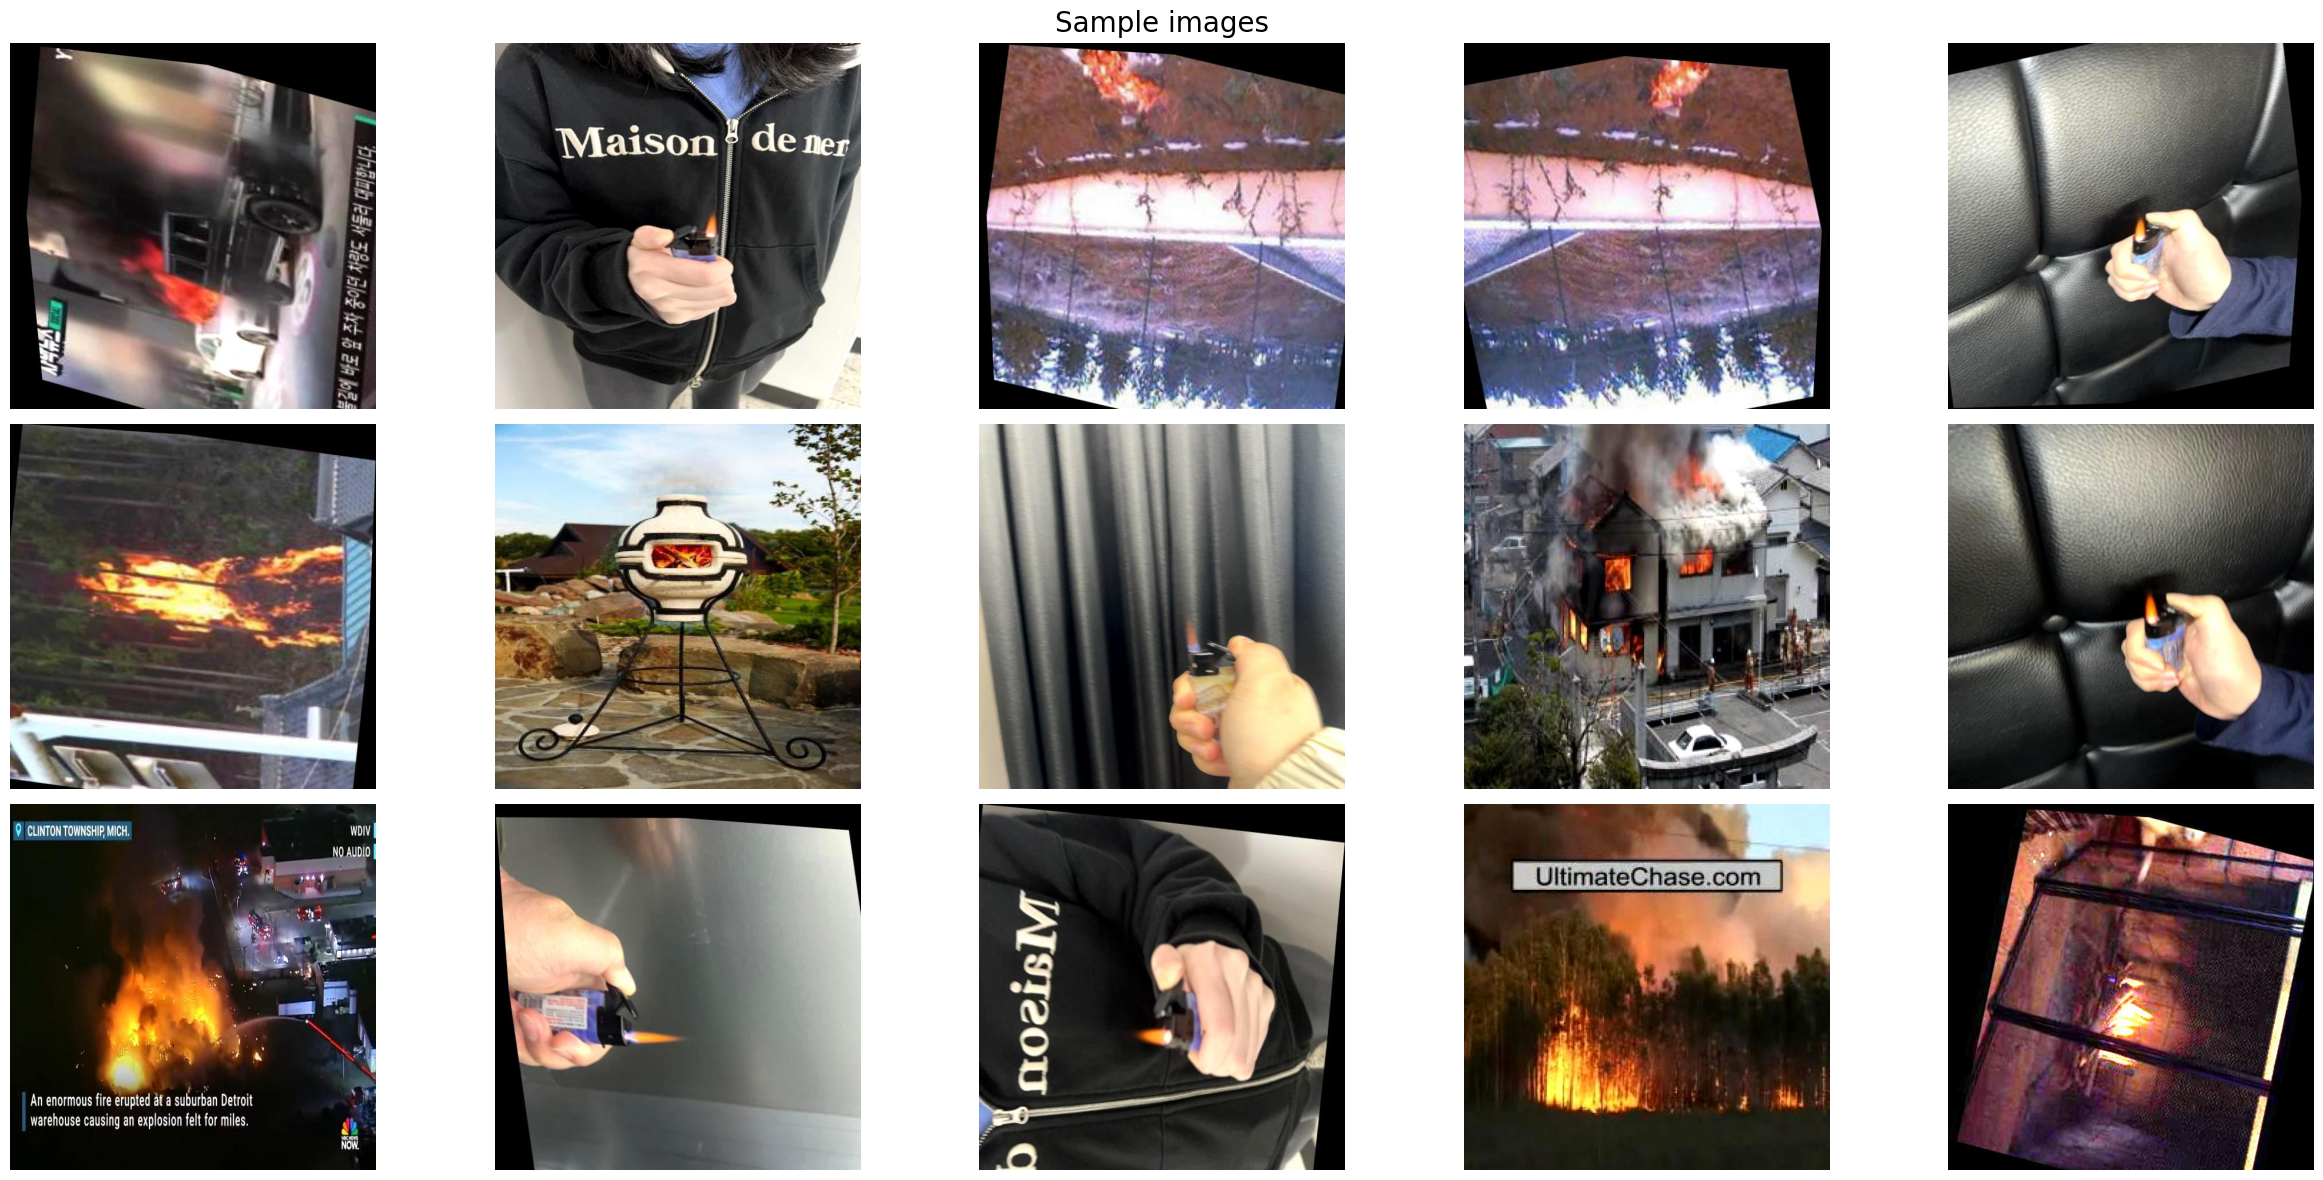

In [34]:
show_images("D:/School/machine_learning/dataset/Fire Detection.v10i.yolov8/train/images", "Sample images")

**Observe that:**            
- The training set contains various types of fire, which increases the accuracy of fire detection:
    - Big fire (building fire, warehouse fire, forest fire)
    - Small/Starting fire (lighter, kitchen fire incident)
- Data Augmentation is already applied (rotated, sheared, flipped, random cropped images)


## Bounding-box Analysis
Bounding boxes are represented by label ```.txt``` files in the labels directory.          
Labels use YOLO format: ```<class id> <x coordinate> <y coordinate> <width> <height>```     
In the case of fire detection, fire images have ```class id``` of 1 and non-fire images do not have label (since there is no bounding box).

In [32]:
def analyze_bounding_box(img_dir, label_dir, image_ext=".jpg"):
    '''
    Count the total number of images, detect unlabelled images (without boxes), 
    minimum and maximum number of boxes in images
    
    Args:
    label_dir           Directory of label files (.txt, YOLOv8 format)
    image_ext=".jpg"    Default image extension (.jpg)
    
    Output:
    Print total number of images, unlabelled images, min and max boxes in images
    Plot a histogram of 
    '''
    box_counts = []
    total_images = 0

    for label_file in os.listdir(label_dir):
        if not label_file.endswith(".txt"): # if the file is not in the format, ignore
            continue

        label_path = os.path.join(label_dir, label_file) # get the full path of the label file

        with open(label_path, "r") as f:
            lines = f.readlines()
            box_counts.append(len(lines))  # number of boxes in one image
    
    # count the total number of images
    for img_file in os.listdir(img_dir):
        if os.path.isfile(os.path.join(img_dir, img_file)):
            total_images += 1
    
    boxed_images = len(box_counts)
    no_box_images = total_images - boxed_images
    
    min_box_count = min(box_counts)
    max_box_count = max(box_counts)
    
    return box_counts, total_images, boxed_images, no_box_images, max_box_count, min_box_count

Bounding-box Analysis
Fire images: 21006
Non-fire images: 5197
Max boxes in an image: 14
Min boxes in an image: 1


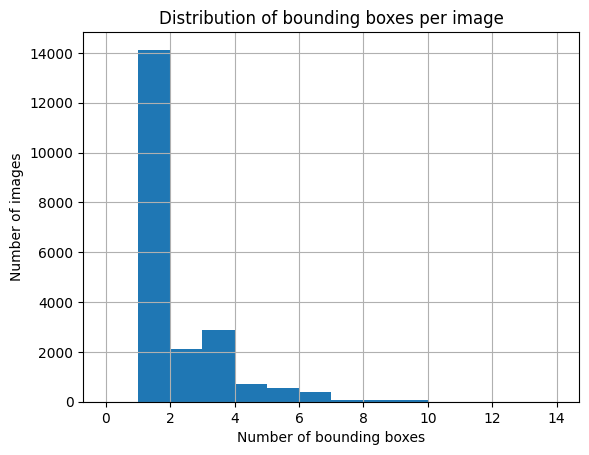

In [33]:
label_folder = "D:/School/machine_learning/dataset/Fire Detection.v10i.yolov8/train/labels"
image_folder = "D:/School/machine_learning/dataset/Fire Detection.v10i.yolov8/train/images"
box_counts, _, boxed_images, no_box_images, max_box_count, min_box_count = analyze_bounding_box(image_folder, label_folder)

print("Bounding-box Analysis")
print(f"Fire images: {boxed_images}")
print(f"Non-fire images: {no_box_images}")
print(f"Max boxes in an image: {max_box_count}")
print(f"Min boxes in an image: {min_box_count}")
    
# histogram of bounding box counts
plt.hist(box_counts, bins=range(0, max(box_counts)+1), align='mid')
plt.title("Distribution of bounding boxes per image")
plt.xlabel("Number of bounding boxes")
plt.ylabel("Number of images")
plt.grid(True)
plt.show()

**Observe that:**             
The training set consists of 21006 fire images and 5197 non-fire ones, which is likely to be seen as imbalanced. However, since our goal is Fire Detection, a ratio of "4 position: 1 negative" does not affect the model as in Classification.     
        
To ensure the model product accurate detection, we increase the confidence threshold (............) to reduce false positive.